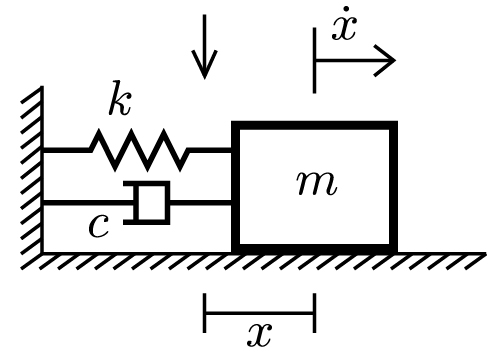

The above diagram shows a spring-mass-damper system. One of the applications of this system is the Tuned Mass Damper (TMD), which is used to dampen earthquakes in buildings.

To observe the dynamics of the object above, we can use the equation: 

$m \frac{d^2 x}{dt^2} + c \frac{dx}{dt} + kx = 0 ...(1)$ 

where $m$ is the mass, $c$ is damping constant, and $k$ is spring constant. $x$ represents the distance/position of the object from its equilibrium point, while $\frac{dx}{dt} = \dot{x} = v$ represents the velocity of the object.

We can write the equation (1) into first order differential equations system, that is:

$\dot{x} = v ...(2)$

$\dot{v} = -\frac{cv + kx}{m} ...(3)$

where $x$ and $v$ are function in $t$.

By using the fourth-order Runge-Kutta method, we can approximate the results of the system of differential equations (2) and (3) using the code below. 

---

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def RK_4_pegas_massa(x0, v0, m, c, k, T, dt):
    Nt = int((T-0)/dt)
    t = [i*dt for i in range(Nt+1)] 
    x = [0 for i in range(Nt+1)]
    v = [0 for i in range(Nt+1)]

    x[0] = x0
    v[0] = v0

    for i in range (Nt):
      
      #Calculate K and L
      k1 = v[i]
      l1 = -(c*v[i]+k*x[i])/m
      k2 = v[i]+(l1/2)
      l2 = -(c*(v[i]+l1/2)+k*(x[i]+k1/2))/m
      k3 = v[i]+(l2/2)
      l3 = -(c*(v[i]+l2/2)+k*(x[i]+k2/2))/m
      k4 = v[i]+(l3)
      l4 = -(c*(v[i]+l3)+k*(x[i]+k3))/m

      #Calculate x and v
      x[i+1] = x[i] + (dt/6)*(k1+2*k2+2*k3+k4)
      v[i+1] = v[i] + (dt/6)*(l1+2*l2+2*l3+l4)

    return [t, x, v]

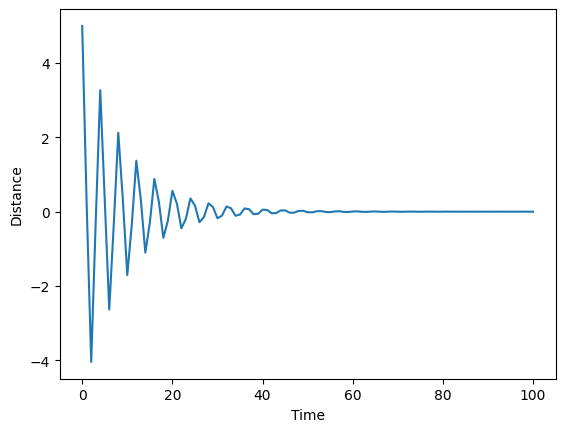

In [3]:
#Testing the code with arbitrary number

x0 = 5
v0 = 0
m = 2
c = 0.1
k = 5
T = 100
dt = 1

hasil = RK_4_pegas_massa(x0, v0, m, c, k, T, dt)

x = hasil[1]
t = hasil[0]


plt.plot(t,x)
plt.xlabel("Time")
plt.ylabel("Distance")
plt.show()